In [1]:
import pandas as pd
import numpy as np
from numpy import *
from sklearn.model_selection import train_test_split # 逻辑回归
import sklearn.metrics as metrics # 绘制ROC曲线
import statsmodels.api as sma 
import  matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号‘-’显示为方块的问题

In [2]:
cre_score = pd.read_csv('../数据/credit_score.csv') # 信用局评分

In [3]:
data1 = pd.read_csv('../数据/data_model.csv')

In [4]:
data1.loc[data1.OCCUPATION_TYPE.isna(),'OCCUPATION_TYPE'] = 'Unknow'
data1['AGE'] = (-data1['DAYS_BIRTH']/365).apply(lambda x: round(x))
data1['WORK_TIME'] = (-data1['DAYS_EMPLOYED']/365).apply(lambda x: round(x))

In [5]:
data1.loc[data1['WORK_TIME']==-1001,'WORK_TIME'] = 'Unknow'

In [6]:
data1.head()

,Unnamed: 0,ID,is_ovd,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,WORK_TIME
0,0,5008806,0.0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,-21474,-1134,1,0,0,0,Security staff,2.0,59,3
1,1,5008809,0.0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,...,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
2,2,5008810,0.0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,...,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
3,3,5008811,0.0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,...,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
4,4,5008812,0.0,F,N,Y,0,283500.0,Pensioner,Higher education,...,-22464,365243,1,0,0,0,Unknow,1.0,62,Unknow


#### 创建虚拟变量

In [7]:
# 性别
data1.loc[data1['CODE_GENDER']=='F','CODE_GENDER_F'] = 1
# 是否有房产
data1.loc[data1['FLAG_OWN_REALTY']=='Y','FLAG_OWN_REALTY_Y'] = 1
# 年收入
data1.loc[data1['AMT_INCOME_TOTAL']<108225,'AMT_INCOME_TOTAL_1'] = 1
data1.loc[data1['AMT_INCOME_TOTAL'].isin(range(108225,225382)),'AMT_INCOME_TOTAL_2'] = 1
# 收入类别
data1.loc[data1['NAME_INCOME_TYPE']=='Pensioner','NAME_INCOME_TYPE_1'] = 1
data1.loc[data1['NAME_INCOME_TYPE']=='Working','NAME_INCOME_TYPE_2'] = 1
data1.loc[data1['NAME_INCOME_TYPE']=='Commercial associate','NAME_INCOME_TYPE_3'] = 1
# 婚姻状态
data1.loc[data1['NAME_FAMILY_STATUS']=='Single / not married','NAME_FAMILY_STATUS_1'] = 1
data1.loc[data1['NAME_FAMILY_STATUS']=='Widow','NAME_FAMILY_STATUS_1'] = 1
data1.loc[data1['NAME_FAMILY_STATUS']=='Separated','NAME_FAMILY_STATUS_2'] = 1
data1.loc[data1['NAME_FAMILY_STATUS']=='Civil marriage','NAME_FAMILY_STATUS_3'] = 1
# 年龄
data1.loc[data1['AGE'].isin(range(0,36)),'AGE_1'] = 1
data1.loc[data1['AGE'].isin(range(36,43)),'AGE_2'] = 1
# 是否哟email
data1.loc[data1['FLAG_EMAIL']==1,'FLAG_EMAIL_Y'] = 1
# 职业
data1.loc[data1['OCCUPATION_TYPE']=='Drivers','OCCUPATION_TYPE_1'] = 1
data1.loc[data1['OCCUPATION_TYPE']=='Laborers','OCCUPATION_TYPE_2'] = 1
data1.loc[data1['OCCUPATION_TYPE']=='Managers','OCCUPATION_TYPE_3'] = 1
data1.loc[data1['OCCUPATION_TYPE']=='Core staff','OCCUPATION_TYPE_4'] = 1
data1.loc[data1['OCCUPATION_TYPE']=='Sales staff','OCCUPATION_TYPE_5'] = 1
data1.loc[data1['OCCUPATION_TYPE']=='Unknow','OCCUPATION_TYPE_6'] = 1
# 家庭人数
data1.loc[data1['CNT_FAM_MEMBERS']<=1 ,'CNT_FAM_MEMBERS_1'] = 1
data1.loc[data1['CNT_FAM_MEMBERS']==2 ,'CNT_FAM_MEMBERS_2'] = 1
data1.loc[data1['CNT_FAM_MEMBERS']==3 ,'CNT_FAM_MEMBERS_3'] = 1
# 工作年限 
data1.loc[data1['WORK_TIME']=='Unknow','WORK_TIME_1'] = 1
data1.loc[data1['WORK_TIME'].isin(range(2,8)),'WORK_TIME_2'] = 1
data1.loc[data1['WORK_TIME'].isin(range(8,11)),'WORK_TIME_3'] = 1 # -----------8以上合起来了！---------
# 填充缺失值
data1.fillna(0,inplace=True)

In [8]:
data = pd.merge(data1,cre_score,on='ID',how='left')

#### 逻辑回归

In [9]:
x = data.loc[:,'CODE_GENDER_F':]
x.drop(columns=['credit_score'],inplace=True)
y = data['is_ovd']
# 训练：测试=7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [10]:
lr = sma.Logit(y_train,x_train)
result = lr.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.084908
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  -0.019    
Dependent Variable:   is_ovd            AIC:               29470.2041
Date:                 2020-08-30 11:35  BIC:               29721.7661
No. Observations:     173248            Log-Likelihood:    -14710.   
Df Model:             24                LL-Null:           -14442.   
Df Residuals:         173223            LLR p-value:       1.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
CODE_GENDER_F        -0.8745   0.0401 -21.8129 0.0000 -0.9531 -0.7960
FLAG_OWN_REALTY_Y    -0.5890   0.0355 -16.5988 0.0000 -0.6585 -0.5194
AMT_INCOME_TOTAL_1   -0.0395   0.0595  -0.6634 0.5071 -0.1562  0.0772
AMT_INCOME_TOTAL_2   -0.2820   0.0418  -6.7542 0.0000 -0.3639 -0.2002
NAME_INCOME_TYPE_1    6.7932   0.5985  11.3511 0.0000  5.6203  7.9662
NAME_INCOME_TYPE_2   -1.0260   0.0485 -21.1705 0.0000 -1.1209 -0.9310
NAME_INCOME_TYPE_3   -1.1183   0.0581 -19.2402 0.0000 -1.2322 -1.0044
NAME_FAMILY_STATUS_1  1.2786   0.0802  15.9507 0.0000  1.1215  1.4357
NAME_FAMILY_STATUS_2  0.9131   0.0929   9.8279 0.0000  0.7310  1.0952
NAME_FAMILY_STATUS_3  0.1790   0.0696   2.5714 0.0101  0.0426  0.3154
AGE_1                -0.6931   0.0474 -14.6275 0.0000 -0.7859 -0.6002
AGE_2                -0.9739   0.0544 -17.8903 0.0000 -1.0806 -0.8672
FLAG_EMAIL_Y         -0.2132   0.0652  -3.2712 0.0011 -0.3410 -0.0855
OCCUPATION_TYPE_1    -0.9494   0.0813 -11.6721 0.0000 -1.1088 -0.7900
OCCUPATION_TYPE_2    -0.7379   0.0574 -12.8548 0.0000 -0.8504 -0.6254
OCCUPATION_TYPE_3    -0.8438   0.0735 -11.4748 0.0000 -0.9879 -0.6996
OCCUPATION_TYPE_4    -0.9293   0.0713 -13.0418 0.0000 -1.0689 -0.7896
OCCUPATION_TYPE_5    -0.2219   0.0743  -2.9844 0.0028 -0.3676 -0.0762
OCCUPATION_TYPE_6    -0.7714   0.0625 -12.3416 0.0000 -0.8939 -0.6489
CNT_FAM_MEMBERS_1    -2.2303   0.0946 -23.5878 0.0000 -2.4157 -2.0450
CNT_FAM_MEMBERS_2    -1.2715   0.0465 -27.3661 0.0000 -1.3625 -1.1804
CNT_FAM_MEMBERS_3    -1.1789   0.0600 -19.6436 0.0000 -1.2966 -1.0613
WORK_TIME_1          -7.6982   0.6011 -12.8067 0.0000 -8.8764 -6.5201
WORK_TIME_2          -0.2265   0.0426  -5.3139 0.0000 -0.3100 -0.1430
WORK_TIME_3          -0.3566   0.0629  -5.6712 0.0000 -0.4798 -0.2333
=====================================================================

"""

In [11]:
# 将显著变量（年收入）去掉
x = data.loc[:,'CODE_GENDER_F':]
x.drop(columns=['AMT_INCOME_TOTAL_1','credit_score'],inplace=True)
y = data['is_ovd']
# 训练：测试=7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
lr = sma.Logit(y_train,x_train)
result = lr.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.084909
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  -0.019    
Dependent Variable:   is_ovd            AIC:               29468.6455
Date:                 2020-08-30 11:35  BIC:               29710.1450
No. Observations:     173248            Log-Likelihood:    -14710.   
Df Model:             23                LL-Null:           -14442.   
Df Residuals:         173224            LLR p-value:       1.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
CODE_GENDER_F        -0.8817   0.0386 -22.8542 0.0000 -0.9574 -0.8061
FLAG_OWN_REALTY_Y    -0.5894   0.0355 -16.6182 0.0000 -0.6589 -0.5199
AMT_INCOME_TOTAL_2   -0.2680   0.0361  -7.4290 0.0000 -0.3387 -0.1973
NAME_INCOME_TYPE_1    6.7925   0.5985  11.3491 0.0000  5.6195  7.9656
NAME_INCOME_TYPE_2   -1.0317   0.0477 -21.6497 0.0000 -1.1251 -0.9383
NAME_INCOME_TYPE_3   -1.1204   0.0580 -19.3138 0.0000 -1.2341 -1.0067
NAME_FAMILY_STATUS_1  1.2813   0.0801  16.0032 0.0000  1.1243  1.4382
NAME_FAMILY_STATUS_2  0.9161   0.0928   9.8724 0.0000  0.7343  1.0980
NAME_FAMILY_STATUS_3  0.1806   0.0696   2.5952 0.0095  0.0442  0.3169
AGE_1                -0.6964   0.0471 -14.7831 0.0000 -0.7887 -0.6041
AGE_2                -0.9768   0.0543 -18.0023 0.0000 -1.0831 -0.8704
FLAG_EMAIL_Y         -0.2105   0.0651  -3.2357 0.0012 -0.3381 -0.0830
OCCUPATION_TYPE_1    -0.9520   0.0812 -11.7189 0.0000 -1.1112 -0.7928
OCCUPATION_TYPE_2    -0.7411   0.0572 -12.9568 0.0000 -0.8532 -0.6290
OCCUPATION_TYPE_3    -0.8401   0.0733 -11.4587 0.0000 -0.9838 -0.6964
OCCUPATION_TYPE_4    -0.9312   0.0712 -13.0798 0.0000 -1.0707 -0.7916
OCCUPATION_TYPE_5    -0.2235   0.0743  -3.0078 0.0026 -0.3691 -0.0778
OCCUPATION_TYPE_6    -0.7728   0.0625 -12.3719 0.0000 -0.8952 -0.6504
CNT_FAM_MEMBERS_1    -2.2352   0.0943 -23.7129 0.0000 -2.4200 -2.0505
CNT_FAM_MEMBERS_2    -1.2753   0.0461 -27.6745 0.0000 -1.3656 -1.1850
CNT_FAM_MEMBERS_3    -1.1820   0.0598 -19.7598 0.0000 -1.2992 -1.0648
WORK_TIME_1          -7.7078   0.6010 -12.8253 0.0000 -8.8857 -6.5299
WORK_TIME_2          -0.2277   0.0426  -5.3493 0.0000 -0.3112 -0.1443
WORK_TIME_3          -0.3578   0.0628  -5.6944 0.0000 -0.4810 -0.2347
=====================================================================

"""

In [12]:
test = pd.DataFrame()
test['pre1'] = result.predict(x_test)
test['pre2'] = test['pre1'].apply(lambda x: round(x))
test['is_ovd'] = y_test.values
(test['pre2'] == y_test).agg(sum)/len(test) # 预测准确率

0.9836902356902357

In [13]:
train = pd.DataFrame()
train['pre1'] = result.predict(x_train)
train['pre2'] = train['pre1'].apply(lambda x: round(x))
train['is_ovd'] = y_train.values
(train['pre2'] == train['is_ovd']).agg(sum)/len(train) # 预测准确率

0.9840806243073513

#### 混淆矩阵

In [14]:
hx = pd.DataFrame()
hx['1'] = ['训练集','训练集','测试集','测试集']
hx['2'] = ['预测为0','预测为1','预测为0','预测为1']
hx.loc[0,'实际为0'] = (train[train['is_ovd']==0]['pre2'] == train[train['is_ovd']==0]['is_ovd']).agg(sum)
hx.loc[1,'实际为0'] = len(train[train['is_ovd']==0]) - hx.loc[0,'实际为0']
hx.loc[0,'实际为1'] = (train[train['is_ovd']==1]['pre2'] != train[train['is_ovd']==1]['is_ovd']).agg(sum)
hx.loc[1,'实际为1'] = (train[train['is_ovd']==1]['pre2'] == train[train['is_ovd']==1]['is_ovd']).agg(sum)

hx.loc[2,'实际为0'] = (test[test['is_ovd']==0]['pre2'] == test[test['is_ovd']==0]['is_ovd']).agg(sum)
hx.loc[3,'实际为0'] = len(test[test['is_ovd']==0]) - hx.loc[2,'实际为0']
hx.loc[2,'实际为1'] = (test[test['is_ovd']==1]['pre2'] != test[test['is_ovd']==1]['is_ovd']).agg(sum)
hx.loc[3,'实际为1'] = (test[test['is_ovd']==1]['pre2'] == test[test['is_ovd']==1]['is_ovd']).agg(sum)

hx.set_index(['1','2'],inplace=True)

hx.loc['训练集','预测准确率'] = format((train['pre2'] == train['is_ovd']).agg(sum)/len(train),'.2%')
hx.loc['测试集','预测准确率'] = format((test['pre2'] == test['is_ovd']).agg(sum)/len(test),'.2%')

hx.loc['训练集','违约用户预测准确率'] = format(hx['实际为1'][1]/(train.is_ovd==1).agg(sum),'.2%')
hx.loc['测试集','违约用户预测准确率'] = format(hx['实际为1'][3]/(test.is_ovd==1).agg(sum),'.2%')
hx

实际为0    实际为1   预测准确率 违约用户预测准确率
1   2                                       
训练集 预测为0  170417.0  2755.0  98.41%     2.58%
    预测为1       3.0    73.0  98.41%     2.58%
测试集 预测为0   73018.0  1210.0  98.37%     1.71%
    预测为1       1.0    21.0  98.37%     1.71%

#### ROC曲线

Text(0.5, 1.0, 'ROC曲线')

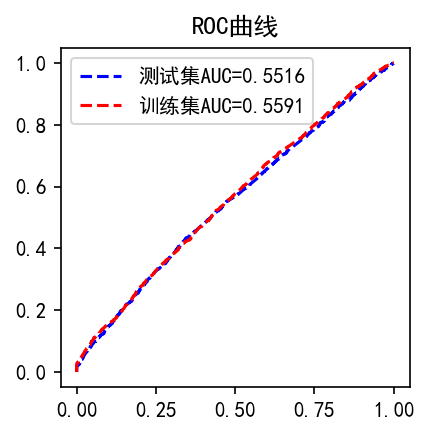

In [15]:
fpr_test,tpr_test,th_test = metrics.roc_curve(test.is_ovd,test.pre1) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(train.is_ovd,train.pre1) # 训练集
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线')

#### 加入信用局评分

In [16]:
x = data.loc[:,'CODE_GENDER_F':]
x.drop(columns=['WORK_TIME_2','OCCUPATION_TYPE_5','FLAG_EMAIL_Y','WORK_TIME_3'],inplace=True)
y = data['is_ovd']
# 训练：测试=7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
lr = sma.Logit(y_train,x_train)
result = lr.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.079103
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Pseudo R-squared:  0.051      
Dependent Variable:  is_ovd            AIC:               27452.8067 
Date:                2020-08-30 11:35  BIC:               27674.1813 
No. Observations:    173248            Log-Likelihood:    -13704.    
Df Model:            21                LL-Null:           -14442.    
Df Residuals:        173226            LLR p-value:       4.6678e-300
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      9.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
CODE_GENDER_F        -0.5576   0.0433 -12.8706 0.0000 -0.6426 -0.4727
FLAG_OWN_REALTY_Y    -0.3109   0.0385  -8.0849 0.0000 -0.3863 -0.2355
AMT_INCOME_TOTAL_1    0.3925   0.0646   6.0801 0.0000  0.2660  0.5190
AMT_INCOME_TOTAL_2    0.1256   0.0482   2.6038 0.0092  0.0311  0.2202
NAME_INCOME_TYPE_1    7.2539   0.6021  12.0482 0.0000  6.0738  8.4339
NAME_INCOME_TYPE_2   -0.3850   0.0592  -6.5012 0.0000 -0.5011 -0.2690
NAME_INCOME_TYPE_3   -0.4670   0.0670  -6.9708 0.0000 -0.5984 -0.3357
NAME_FAMILY_STATUS_1  1.1301   0.0808  13.9848 0.0000  0.9717  1.2885
NAME_FAMILY_STATUS_2  0.8504   0.0931   9.1360 0.0000  0.6680  1.0328
NAME_FAMILY_STATUS_3  0.2190   0.0700   3.1285 0.0018  0.0818  0.3562
AGE_1                -0.3033   0.0484  -6.2725 0.0000 -0.3981 -0.2085
AGE_2                -0.5438   0.0562  -9.6847 0.0000 -0.6539 -0.4338
OCCUPATION_TYPE_1    -0.2980   0.0840  -3.5483 0.0004 -0.4626 -0.1334
OCCUPATION_TYPE_2    -0.2613   0.0585  -4.4699 0.0000 -0.3759 -0.1467
OCCUPATION_TYPE_3    -0.1861   0.0751  -2.4780 0.0132 -0.3333 -0.0389
OCCUPATION_TYPE_4    -0.3090   0.0726  -4.2562 0.0000 -0.4512 -0.1667
OCCUPATION_TYPE_6    -0.2761   0.0636  -4.3394 0.0000 -0.4008 -0.1514
CNT_FAM_MEMBERS_1    -1.3453   0.1013 -13.2848 0.0000 -1.5438 -1.1469
CNT_FAM_MEMBERS_2    -0.4763   0.0574  -8.2916 0.0000 -0.5889 -0.3637
CNT_FAM_MEMBERS_3    -0.5029   0.0685  -7.3439 0.0000 -0.6371 -0.3687
WORK_TIME_1          -7.5839   0.6038 -12.5610 0.0000 -8.7672 -6.4005
credit_score         -0.0048   0.0001 -42.3022 0.0000 -0.0050 -0.0046
=====================================================================

"""

Text(0.5, 1.0, 'ROC曲线')

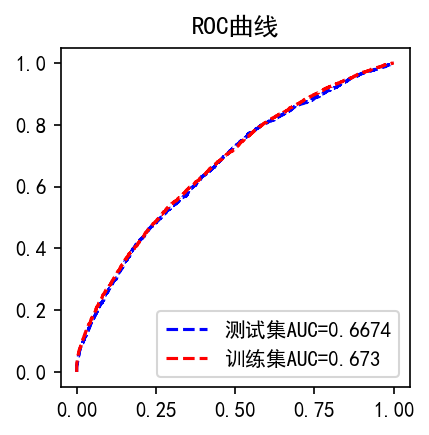

In [17]:
test = pd.DataFrame()
test['pre1'] = result.predict(x_test)
test['pre2'] = test['pre1'].apply(lambda x: round(x))
test['is_ovd'] = y_test.values
train = pd.DataFrame()
train['pre1'] = result.predict(x_train)
train['pre2'] = train['pre1'].apply(lambda x: round(x))
train['is_ovd'] = y_train.values
fpr_test,tpr_test,th_test = metrics.roc_curve(test.is_ovd,test.pre1) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(train.is_ovd,train.pre1) # 训练集
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线')

# task6代码.ipynb

In [24]:
x = data.loc[:,'CODE_GENDER_F':]
x.drop(columns=['WORK_TIME_2','OCCUPATION_TYPE_5','FLAG_EMAIL_Y','WORK_TIME_3'],inplace=True)
y = data['is_ovd']
# 训练：测试=7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
lr = sma.Logit(y_train,x_train)
result = lr.fit()

Optimization terminated successfully.
         Current function value: 0.079103
         Iterations 9


#### 将概率转化成分数且为正整数

In [25]:
# 评分卡刻度 A、B
def cal_scale(score,odds,PDO):
    '''
    参数：
        odds: 设定的坏好比
        score: 在这个odds下的分数
        PDO： 好坏翻倍比
        model: 逻辑回归模型
    return：
        A,B
    '''
    B = PDO/np.log(2)
    A = score + B*np.log(odds)
    # base_score = A+B*model.intercept_[0]
    print('B: {:.2f}'.format(B))
    print('A: {:.2f}'.format(A))
    # print('基础分为：{:.2f}'.format(base_score))
    return A,B

In [26]:
def Pre2Score(pre,A,B):
    y = np.log(pre/(1-pre))
    return round(A-B*y)

In [33]:
A,B = cal_scale(725,0.05,25) # 假设基础分为50，odds为5%，PDO为10

B: 36.07
A: 616.95


Text(0, 0.5, '频数')

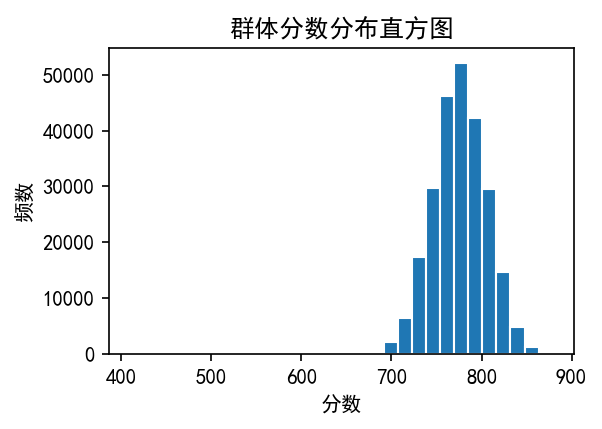

In [34]:
all_cust = pd.DataFrame({'pre':result.predict(x),'is_ovd':y})
all_cust['score'] = all_cust['pre'].map(lambda x:Pre2Score(x,A,B))
# 直方图
plt.figure(dpi=150,figsize=(4,2.7))
plt.hist(all_cust['score'].values,edgecolor='w',bins=30)
plt.title('群体分数分布直方图');plt.xlabel('分数');plt.ylabel('频数')

In [35]:
all_cust['score'].describe()

count    247498.000000
mean        775.650599
std          30.020984
min         410.000000
25%         756.000000
50%         776.000000
75%         796.000000
max         879.000000
Name: score, dtype: float64

In [36]:
train = pd.DataFrame({'pre':result.predict(x_train),'is_ovd':y_train})
train['score'] = train['pre'].map(lambda x:Pre2Score(x,A,B))
train['score'].describe()

count    173248.000000
mean        775.636763
std          30.062297
min         428.000000
25%         756.000000
50%         776.000000
75%         796.000000
max         879.000000
Name: score, dtype: float64

In [37]:
test = pd.DataFrame({'pre':result.predict(x_test),'is_ovd':y_test})
test['score'] = test['pre'].map(lambda x:Pre2Score(x,A,B))
test['score'].describe()

count    74250.000000
mean       775.682882
std         29.924545
min        410.000000
25%        756.000000
50%        776.000000
75%        796.000000
max        875.000000
Name: score, dtype: float64

#### 模型分数稳定性监控表

In [43]:
model = pd.DataFrame(columns = ['分数','建模样本数','百分比1','评分样本数','百分比2','ln(百分比比例)','百分比变化','IV值'])

for i in [[400,600],[600,700],[700,800],[800,900]]: # [400,500],[500,600]
    model = model.append([{'建模样本数':train['score'].isin(range(i[0],i[1])).agg(sum),'评分样本数':test['score'].isin(range(i[0],i[1])).agg(sum)}])

model['分数'] = ['400-600','600-700','700-800','800-900'] # '400-500','500-600'
model['百分比1'] = model['建模样本数']/len(train)
model['百分比2'] = model['评分样本数']/len(test)
model['ln(百分比比例)'] = (model['百分比2']/model['百分比1']).apply(lambda x: np.log(x))
model['百分比变化'] = (model['百分比2'] - model['百分比1'])
model.set_index('分数',inplace=True)
model.loc['合计'] = model.agg(sum)
# 格式化
model['IV值'] = (model['百分比变化'] * model['ln(百分比比例)'])
model['百分比1'] = model['百分比1'].apply(lambda x: format(x,'.2%'))
model['百分比2'] = model['百分比2'].apply(lambda x: format(x,'.2%'))
model['ln(百分比比例)'] = model['ln(百分比比例)'].apply(lambda x: round(x,3))
model['百分比变化'] = model['百分比变化'].apply(lambda x: format(x,'.2%'))
model

,建模样本数,百分比1,评分样本数,百分比2,ln(百分比比例),百分比变化,IV值
分数,,,,,,,
400-600,76,0.04%,22,0.03%,-0.392,-0.01%,5.5871e-05
600-700,788,0.45%,333,0.45%,-0.014,-0.01%,8.94027e-07
700-800,135227,78.05%,58087,78.23%,0.002,0.18%,4.03853e-06
800-900,37157,21.45%,15808,21.29%,-0.007,-0.16%,1.1543e-05
合计,173248,100.00%,74250,100.00%,-0.412,-0.00%,6.15761e-18


#### 模型预测能力监控报表

In [44]:
model2 = pd.DataFrame(columns=['细分单元','最高分','最低分','建模样本坏客户率','评分样本坏客户率'])

for i in [[400,600],[600,700],[700,800],[800,900]]: # [400,500],[500,600]
    a = train[train['score'].isin(range(i[0],i[1]))]
    b = test[test['score'].isin(range(i[0],i[1]))]
    model2 = model2.append([{'最高分':max(max(a['score']),max(b['score'])), '最低分':min(min(a['score']),min(b['score'])),
                            '建模样本坏客户率':format(a[a.is_ovd == 1]['score'].count()/len(a),'.2%'),
                            '评分样本坏客户率':format(b[b.is_ovd == 1]['score'].count()/len(b),'.2%')}])
model2['细分单元'] = range(1,len(model))
model2.set_index('细分单元')

,最高分,最低分,建模样本坏客户率,评分样本坏客户率
细分单元,,,,
1,565.0,410.0,96.05%,95.45%
2,699.0,648.0,9.90%,9.61%
3,799.0,700.0,1.81%,1.83%
4,879.0,800.0,0.63%,0.74%


#### 模型变量预测能力监控表

In [46]:
writer = pd.ExcelWriter('../task6/模型变量预测能力监控报表.xlsx'); row = 0
for i in [['CODE_GENDER','性别'],['FLAG_OWN_REALTY','是否有房产'],['NAME_INCOME_TYPE','收入类型'],['NAME_FAMILY_STATUS','婚姻状况'],['OCCUPATION_TYPE','职业'],
          ['AMT_INCOME_TOTAL','年收入'],['AGE','年龄'],['CNT_FAM_MEMBERS','家庭人数'],['WORK_TIME','工作年限']]:
    a  = pd.Series(x.columns); a[a.str.contains(i[0])]
    df = pd.DataFrame(columns=[i[1],'建模样本数','建模坏客户数','建模坏客户率','评分样本数','评分坏客户数','评分坏客户率'])
    a  = pd.Series(x.columns); b = a[a.str.contains(i[0])]
    df = pd.DataFrame(columns=[i[1],'建模样本数','建模坏客户数','评分样本数','评分坏客户数'])
    
    for j in b:
        df = df.append([{'建模样本数':(x_train[j]==1).agg(sum), '建模坏客户数':y_train[x_train[j]==1].agg(sum), 
                         '评分样本数':(x_test[j]==1).agg(sum), '评分坏客户数':y_test[x_test[j]==1].agg(sum)}])
        
    df[i[1]] = b.values;df.set_index(i[1],inplace=True); 
    df.loc['其他'] = np.array([len(x_train),y_train.agg(sum),len(x_test),y_test.agg(sum)]) - np.array(df.apply(lambda x:sum(x)))
    df.loc['合计'] = df.apply(lambda x:sum(x))
    df.insert(2,'建模坏客户率',(df['建模坏客户数']/df['建模样本数']).apply(lambda x:format(x,'.2%')))
    df['评分坏客户率'] = (df['评分坏客户数']/df['评分样本数']).apply(lambda x:format(x,'.2%'))
    # df.columns=['建模样本数','建模坏客户数','建模坏客户率','评分样本数','评分坏客户数','评分坏客户率']
    df.to_excel(writer,startrow=row)
    row = row + len(df) + 2
writer.save()